# BECHEUR Yazid
------

# PROJET 9
# PRODUIRE UNE ETUDE DE MARCHE AVEC PYTHON
-------

# MISSION : 
## EFFECTUER UNE PREMIÈRE ANALYSE D'UN GROUPEMENT DE PAYS CILBES POUR UNE EXPORTATION DE POULET
-------

# PLAN DE TRAVAIL

## I. IMPORTATION DES LIBRAIRIES
## II. IMPORTATION DES DONNÉES
        - Préparation et netoyage des données
        - Jointures des datasets   
## III. MÉTHODE DE CLASSIFICATION ASCENDENTE HIÉRARCHIQUE (CAH)
## IV. MÉTHODE K-MEANS
## V. ANALYSE DES GROUPES 

## VI.METHODE D'ANALYSE DES COMPOSANTES PRINCIPALES (ACP)
## VII. EXPLORATION DU CLUSTER SÉLECTIONNÉ 
## VIII. CONCLUSION
--------

##  I. IMPORTATION DES LIBRAIRIES
--------

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import cluster, metrics
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from matplotlib.collections import LineCollection
from functions import *
from sklearn.metrics import silhouette_score
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings("ignore")
from kneed import KneeLocator
from yellowbrick.cluster import SilhouetteVisualizer


-------
## II. IMPORTATION DES DONNÉES
------
     - Dataset Population (2000-2018)
     - Dataset Dispinibilité alimentaire (année 2017)
     - Dataset PIB (croissance anuelle par pays année 2017)

#### DATASET POPULATION

In [64]:
# Importer le fichier population 
population = pd.read_csv('Population_2000_2018.csv')
population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


#### CALCULER LE TAUX DE CROISSANCE DEMOGRAPHIQUE SUR 5 ANS

   - Cette nouvelle variable qui reflète la dynamique démographique sur la période 2012-2017

In [65]:
# Calculer une nouvelle variable pour notre analyse : la croissance démographique en % entre 2020 et 2017
population_nv=population.pivot_table(index = 'Zone', columns = 'Année', values = 'Valeur')
#population_nv=population_nv.loc[population_nv['Année']==2000]
population_nv['Croissance démographique (%)']=(population_nv[2017]-population_nv[2012]) /(population_nv[2000])
population_nv.head()

Année,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Croissance démographique (%)
Zone,,,,,,,,,,,,,,,,,,,,
Afghanistan,20779.953,21606.988,22600.770,23680.871,24726.684,25654.277,26433.049,27100.536,27722.276,28394.813,29185.507,30117.413,31161.376,32269.589,33370.794,34413.603,35383.032,36296.113,37171.921,0.247101
Afrique du Sud,44967.708,45571.274,46150.913,46719.196,47291.610,47880.601,48489.459,49119.759,49779.471,50477.011,51216.964,52003.755,52832.658,53687.121,54544.186,55386.367,56207.646,57009.756,57792.518,0.092891
Albanie,3129.243,3129.704,3126.187,3118.023,3104.892,3086.810,3063.021,3033.998,3002.678,2973.048,2948.023,2928.592,2914.096,2903.790,2896.305,2890.513,2886.438,2884.169,2882.740,-0.009564
Algérie,31042.235,31451.514,31855.109,32264.157,32692.163,33149.724,33641.002,34166.972,34730.608,35333.881,35977.455,36661.445,37383.895,38140.133,38923.692,39728.025,40551.392,41389.189,42228.408,0.129027
Allemagne,81400.882,81453.885,81535.122,81614.380,81646.474,81602.741,81472.226,81277.830,81065.752,80899.961,80827.002,80855.632,80972.628,81174.367,81450.378,81787.411,82193.768,82658.409,83124.418,0.020710


In [66]:
# Conserver uniquement la colonne croissance démographique pour notre analyse
population_1=population_nv.loc[:,['Croissance démographique (%)']]
#population_1.rename(columns ={2017: "Population totale"}, inplace= True)
population_1.head()

Année,Croissance démographique (%)
Zone,
Afghanistan,0.247101
Afrique du Sud,0.092891
Albanie,-0.009564
Algérie,0.129027
Allemagne,0.020710


In [67]:
population_1.shape

(238, 1)

In [68]:
# 11 valeurs nulles que nous traiterons au moment des jointures
population_1.isnull().sum()

Année
Croissance démographique (%)    11
dtype: int64

#### DATASET DISPONIBILITE ALIMENTAIRE 2017

In [69]:
# Importer le fichier disponibilité_alimentaire_2017 au format csv
disponibilité_alim_2017 = pd.read_csv('disponibilite_alimentaire_2017.csv')
disponibilité_alim_2017.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [70]:
# Affichher uniquement les colonnes dont nous avons besoin
dispo_2017=disponibilité_alim_2017.loc[:,['Zone','Élément','Produit','Valeur']]
dispo_2017.head()

,Zone,Élément,Produit,Valeur
0,Afghanistan,Production,Blé et produits,4281.0
1,Afghanistan,Importations - Quantité,Blé et produits,2302.0
2,Afghanistan,Variation de stock,Blé et produits,-119.0
3,Afghanistan,Exportations - Quantité,Blé et produits,0.0
4,Afghanistan,Disponibilité intérieure,Blé et produits,6701.0


In [71]:
# aucune valeur manquante
dispo_2017.isnull().sum()

Zone       0
Élément    0
Produit    0
Valeur     0
dtype: int64

In [72]:
# Conserver uniquement les données concernant le produit 'Viande de Volailles'
dispo_viande_volaille = dispo_2017.loc[dispo_2017['Produit']==  'Viande de Volailles']
dispo_viande_volaille.head()

,Zone,Élément,Produit,Valeur
651,Afghanistan,Production,Viande de Volailles,28.0
652,Afghanistan,Importations - Quantité,Viande de Volailles,29.0
653,Afghanistan,Variation de stock,Viande de Volailles,0.0
654,Afghanistan,Disponibilité intérieure,Viande de Volailles,57.0
655,Afghanistan,Pertes,Viande de Volailles,2.0


In [73]:
# Vérifier les types de valeurs
dispo_viande_volaille.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 651 to 176400
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Zone     2061 non-null   object 
 1   Élément  2061 non-null   object 
 2   Produit  2061 non-null   object 
 3   Valeur   2061 non-null   float64
dtypes: float64(1), object(3)
memory usage: 80.5+ KB


In [74]:
# Faire un pivot de la colonne Élément et vérifier le nombre de valeurs nulles par colonne
v_v=dispo_viande_volaille.pivot_table(index='Zone', columns='Élément', values = 'Valeur')
v_v.isnull().sum()

Élément
Alimentation pour touristes                                       94
Aliments pour animaux                                            171
Autres utilisations (non alimentaire)                            138
Disponibilité alimentaire (Kcal/personne/jour)                     0
Disponibilité alimentaire en quantité (kg/personne/an)             0
Disponibilité de matière grasse en quantité (g/personne/jour)      0
Disponibilité de protéines en quantité (g/personne/jour)           0
Disponibilité intérieure                                           2
Exportations - Quantité                                           37
Importations - Quantité                                            2
Nourriture                                                         2
Pertes                                                           105
Production                                                         4
Résidus                                                            8
Semences                  

In [75]:
# Les variables que nous utiliserons pour nos analyses sont les disponibilités, l'exportation, l'importation, et la production
# Remplacer les valeurs nulles des colonnes par leurs moyennes
v_v=dispo_viande_volaille.pivot_table(index='Zone', columns='Élément', values = 'Valeur').fillna(v_v.mean())
v_v.head()

Élément,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,,,
Afghanistan,0.217949,0.0,44.117647,5.0,1.53,0.33,0.54,57.0,132.185185,29.0,55.0,2.00000,28.0,0.0,0.0,26.282609,0.0
Afrique du Sud,0.000000,0.0,44.117647,143.0,35.69,9.25,14.11,2118.0,63.000000,514.0,2035.0,83.00000,1667.0,0.0,0.0,26.282609,0.0
Albanie,0.217949,0.0,44.117647,85.0,16.36,6.45,6.26,47.0,0.000000,38.0,47.0,43.58209,13.0,0.0,0.0,26.282609,4.0
Algérie,0.000000,0.0,44.117647,22.0,6.38,1.50,1.97,277.0,0.000000,2.0,264.0,13.00000,275.0,0.0,0.0,26.282609,0.0
Allemagne,0.217949,0.0,44.117647,71.0,19.47,4.16,7.96,1739.0,646.000000,842.0,1609.0,43.58209,1514.0,-38.0,0.0,167.000000,-29.0


### Création de nouvelles variables pour notre analyse
### Définitions

#### Par acquisition 

   - DISPONIBILITE INTERIEUR = Production + importations - exportations + variations des stocks (baisse ou augmentation
   - Taux de dépendance aux importations (TDI) = (Importation ÷ Disponibilité intérieure) x 100 
   - Taux d'auto-suffisance (TAS) = (Production ÷ Disponibilité intérieure) x 100
  
### Plus le TDI est élevé plus la dépendance du pays à l'importation est forte
### Plus le TAS est élevé plus le pays est auto-suffisant cad la production est forte également

In [76]:
# calculer dans 2 nouvelles variables le TDI et le TAS
v_v['TDI (%)']=(v_v['Importations - Quantité']/v_v['Disponibilité intérieure'])*100
v_v['TAS (%)']=(v_v['Production']/v_v['Disponibilité intérieure'])*100
v_v.head()

Élément,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock,TDI (%),TAS (%)
Zone,,,,,,,,,,,,,,,,,,,
Afghanistan,0.217949,0.0,44.117647,5.0,1.53,0.33,0.54,57.0,132.185185,29.0,55.0,2.00000,28.0,0.0,0.0,26.282609,0.0,50.877193,49.122807
Afrique du Sud,0.000000,0.0,44.117647,143.0,35.69,9.25,14.11,2118.0,63.000000,514.0,2035.0,83.00000,1667.0,0.0,0.0,26.282609,0.0,24.268178,78.706327
Albanie,0.217949,0.0,44.117647,85.0,16.36,6.45,6.26,47.0,0.000000,38.0,47.0,43.58209,13.0,0.0,0.0,26.282609,4.0,80.851064,27.659574
Algérie,0.000000,0.0,44.117647,22.0,6.38,1.50,1.97,277.0,0.000000,2.0,264.0,13.00000,275.0,0.0,0.0,26.282609,0.0,0.722022,99.277978
Allemagne,0.217949,0.0,44.117647,71.0,19.47,4.16,7.96,1739.0,646.000000,842.0,1609.0,43.58209,1514.0,-38.0,0.0,167.000000,-29.0,48.418631,87.061530


In [77]:
# dataset avec les colonnes à utiliser pour les jointures et en suite notre analyse
yaz= v_v.loc[:,['Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité de protéines en quantité (g/personne/jour)','TAS (%)','TDI (%)']]
yaz.rename(columns ={"Disponibilité alimentaire (Kcal/personne/jour)": "Disp_alim_Kcal/per/jour","Disponibilité de protéines en quantité (g/personne/jour)": "Disp_prot_g/per/jour","Disponibilité alimentaire en quantité (kg/personne/an)":"Disp_quanti_kg/per/an" }, inplace= True)
yaz.head()

Élément,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,TAS (%),TDI (%)
Zone,,,,,
Afghanistan,1.53,5.0,0.54,49.122807,50.877193
Afrique du Sud,35.69,143.0,14.11,78.706327,24.268178
Albanie,16.36,85.0,6.26,27.659574,80.851064
Algérie,6.38,22.0,1.97,99.277978,0.722022
Allemagne,19.47,71.0,7.96,87.061530,48.418631


#### DATASET PIB 2017

In [78]:
# Importer le fichier pib_2017.csv
pib = pd.read_csv('pib_2017.csv')
pib.head()

,Zone,Pib (%)
0,Afghanistan,3.0
1,Afrique du Sud,17.0
2,Albanie,9.0
3,Algérie,6.0
4,Allemagne,6.0


In [79]:
# lignes et colonnes
pib.shape

(219, 2)

In [80]:
# 8 valeurs nulles que nous traiterons également au moment des jointures
pib.isnull().sum()

Zone       0
Pib (%)    8
dtype: int64

#### JOINTURE 1

In [81]:
# Effectuer la prmère jointure entre le dataset résulant de population avec celui des disponibilités alimentaires
jointure1=yaz.merge(population_1,on='Zone',how='inner')
jointure1.head()

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,TAS (%),TDI (%),Croissance démographique (%)
Zone,,,,,,
Afghanistan,1.53,5.0,0.54,49.122807,50.877193,0.247101
Afrique du Sud,35.69,143.0,14.11,78.706327,24.268178,0.092891
Albanie,16.36,85.0,6.26,27.659574,80.851064,-0.009564
Algérie,6.38,22.0,1.97,99.277978,0.722022,0.129027
Allemagne,19.47,71.0,7.96,87.061530,48.418631,0.020710


In [82]:
# Nombre de lignes et colonnes
jointure1.shape

(172, 6)

#### JOINTURE 2

In [83]:
# Effectuer la deuxième jointure avec le dataset pib 2017  
jointure_finale =jointure1.merge(pib,on='Zone',how='inner')
jointure_finale =jointure_finale.fillna(jointure_finale.mean())
jointure_finale.set_index('Zone', inplace = True)
jointure_finale.head()

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,TAS (%),TDI (%),Croissance démographique (%),Pib (%)
Zone,,,,,,,
Afghanistan,1.53,5.0,0.54,49.122807,50.877193,0.247101,3.0
Afrique du Sud,35.69,143.0,14.11,78.706327,24.268178,0.092891,17.0
Albanie,16.36,85.0,6.26,27.659574,80.851064,-0.009564,9.0
Algérie,6.38,22.0,1.97,99.277978,0.722022,0.129027,6.0
Allemagne,19.47,71.0,7.96,87.061530,48.418631,0.020710,6.0


In [84]:
# Aucune valeur nulle
jointure_finale.isnull().sum()

Disp_quanti_kg/per/an           0
Disp_alim_Kcal/per/jour         0
Disp_prot_g/per/jour            0
TAS (%)                         0
TDI (%)                         0
Croissance démographique (%)    0
Pib (%)                         0
dtype: int64

#### VERIFICATION DE LA DISTRIBUTION DES VARIABLES DE TOUS LES INDIVIDUS

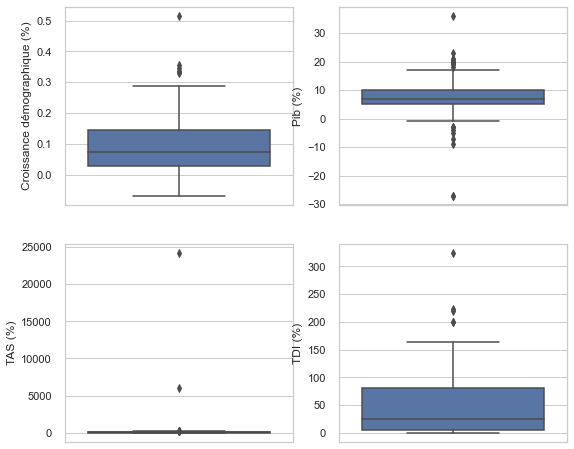

In [85]:
# Afficher des boxplot
plt.figure(figsize=(9, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=jointure_finale,y='Croissance démographique (%)')
plt.subplot(222)
sns.boxplot(data=jointure_finale, y='Pib (%)')
plt.subplot(223)
sns.boxplot(data=jointure_finale, y='TAS (%)')
plt.subplot(224)
sns.boxplot(data=jointure_finale,y='TDI (%)')
plt.savefig('Distribution de l\'ensemble variables.jpg')

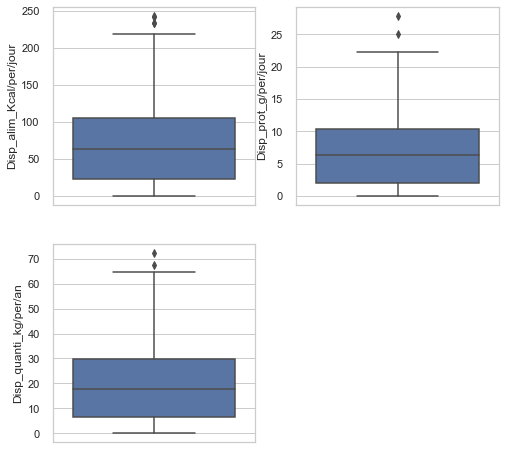

In [86]:
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=jointure_finale,  y='Disp_alim_Kcal/per/jour')
plt.subplot(222)
sns.boxplot(data=jointure_finale,  y='Disp_prot_g/per/jour')
plt.subplot(223)
sns.boxplot(data=jointure_finale,  y='Disp_quanti_kg/per/an')
plt.savefig('Distribution de l\'ensemble variables_suite.jpg')

In [87]:
# Afficher les valeurs extremes de l'auto-suffisance
jointure_finale.sort_values(by = ['TAS (%)'], ascending = False).head()

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,TAS (%),TDI (%),Croissance démographique (%),Pib (%)
Zone,,,,,,,
Djibouti,2.68,9.0,0.92,24173.015873,100.000000,0.105858,5.0
Maldives,13.50,47.0,4.70,6043.253968,100.000000,0.354924,8.0
Belgique,12.65,44.0,4.57,304.605263,222.368421,0.032522,5.0
Pays-Bas,20.33,70.0,8.48,295.698925,163.440860,0.014411,6.0
Pologne,30.30,107.0,12.14,203.373702,4.757785,-0.007103,11.0


### CORRÉLATION DES VARIABLES ENTRE ELLES

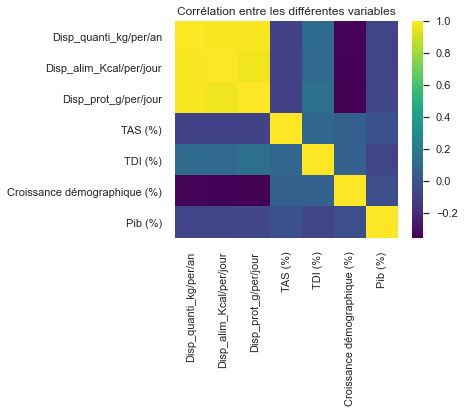

In [88]:
# heatmap de corrélations entre les différentes variables
plt.figure(figsize=(5, 4))
sns.heatmap(jointure_finale.corr(),cmap='viridis')
plt.title('Corrélation entre les différentes variables')
plt.savefig('CORRELATION DES VARIABLES ENTRE ELLES.jpg')


#### MATRICE DE CORRÉLATION

In [89]:
# Afficher la matrice de corrélation
corr_df = jointure_finale.corr()
h=pd.DataFrame(corr_df)
h.head()

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,TAS (%),TDI (%),Croissance démographique (%),Pib (%)
Disp_quanti_kg/per/an,1.000000,0.988206,0.986107,-0.092702,0.111169,-0.344346,-0.084135
Disp_alim_Kcal/per/jour,0.988206,1.000000,0.972554,-0.091300,0.098124,-0.352580,-0.082498
Disp_prot_g/per/jour,0.986107,0.972554,1.000000,-0.092513,0.136544,-0.358283,-0.072077
TAS (%),-0.092702,-0.091300,-0.092513,1.000000,0.086072,0.052737,-0.020281
TDI (%),0.111169,0.098124,0.136544,0.086072,1.000000,0.056810,-0.083297


In [90]:
# Exclure les 2 pays qui représentent des valeurs extrèmes
jointure2=jointure_finale.drop(['Djibouti','Maldives']) # test en suprimant djibouti qui est une valeur extreme
#jointure2=exlu_outliers.fillna(exlu_outliers.mean())
jointure2.head()

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,TAS (%),TDI (%),Croissance démographique (%),Pib (%)
Zone,,,,,,,
Afghanistan,1.53,5.0,0.54,49.122807,50.877193,0.247101,3.0
Afrique du Sud,35.69,143.0,14.11,78.706327,24.268178,0.092891,17.0
Albanie,16.36,85.0,6.26,27.659574,80.851064,-0.009564,9.0
Algérie,6.38,22.0,1.97,99.277978,0.722022,0.129027,6.0
Allemagne,19.47,71.0,7.96,87.061530,48.418631,0.020710,6.0


### LES MOYENNES DES VARIABLES DE TOUS LES INDIVIDUS

In [91]:
# Afficher les moyennes des variables de l'ensemble des individus
jointure2.mean()

Disp_quanti_kg/per/an           20.280179
Disp_alim_Kcal/per/jour         74.827381
Disp_prot_g/per/jour             7.148810
TAS (%)                         78.212220
TDI (%)                         45.167774
Croissance démographique (%)     0.093898
Pib (%)                          7.220238
dtype: float64

### OBSERVATION

Nous observons des valeurs abbérantes pour toutes les variables mais nous optons pour l'exclusion uniquement des valeurs extrèmes des 2 variables TAS.
les pays concernés :
  
 - Djibouti : TAS (%) 24173
 - Maldives : TAS (%) 6043
  
Les moyennes de l'ensemble des individus seront utilisaient pour comparer les moyennes des groupes entre elles

##### CORRELATION

 - Le taux de dépendance à l'importation (TDI) est négativement corrélé au taux d'auto-suffisance (TAS)
 - Le taux de dépendance à l'importation (TDI) est positivement (faiblement) corrélé aux disponibilitées
----
 - Les pays dépendants à l'importation (TDI) sont ceux qui ont un taux d'auto-suffisance (TAS) le plus faible
 - Les pays avec un TDI important ont des disponibilités relativement faibles


----------
## III. CLASSIFICATION ASCENDANTE HIÉRARCHIQUE (CAH)
---------

Afficher la CAH pour avoir une première analyse des clusters

In [92]:
# Selectionner les valeurs à utiliser pour notre analyse
X = jointure2.values
#Centrage / réduction des données pour que nos données puissent prendre la même importance
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
#Clustering hiérarchique: création d'une Matrice des liens selon la Méthode de Ward
Z = linkage(X_scaled, method = 'ward', metric='euclidean')

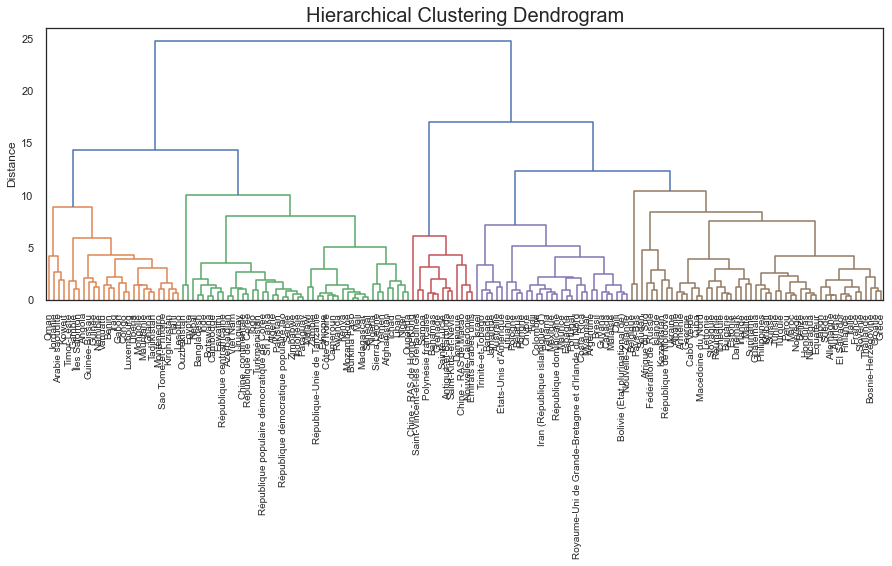

In [93]:
#Clustering hiérarchique: 
#Affichage d'un premier dendrogramme global
fig =plt.figure(figsize=(15,5))
sns.set_style('white')
plt.title('Hierarchical Clustering Dendrogram', fontsize=20)
plt.ylabel('Distance')
dendrogram(Z, labels = jointure2.index, leaf_font_size=10, color_threshold=12, orientation='top')
plt.show()


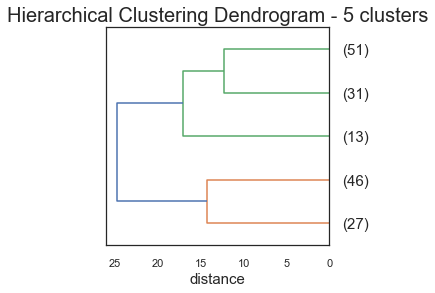

In [94]:
#Découpage du dendrogramme en 5 groupes pour avoir une première idée du partitionnement
fig = plt.figure(figsize=(4,4))
plt.title('Hierarchical Clustering Dendrogram - 5 clusters', fontsize=20)
plt.xlabel('distance', fontsize=15)
dendrogram(Z, labels = jointure2.index, p=5, truncate_mode='lastp', leaf_font_size=15, orientation='left')
plt.show()


#### OBSERVATIONS

Nous optons pour 5 clusters qui se déclinent de la manière suivante :

        - Groupe 1 : 27 pays
        - Groupe 2 : 46 pays
        - Groupe 3 : 13 pays
        - Groupe 4 : 31 pays
        - Groupe 5 : 51 pays
        
Nous analyserons ces 5 groupes pour vérifier la pertinence de cette partition par la suite

----------
## IV. METHODE K-MEANS
----------

### Recherche et vérification du nombre de clusters 

### METHODE DU COUDE

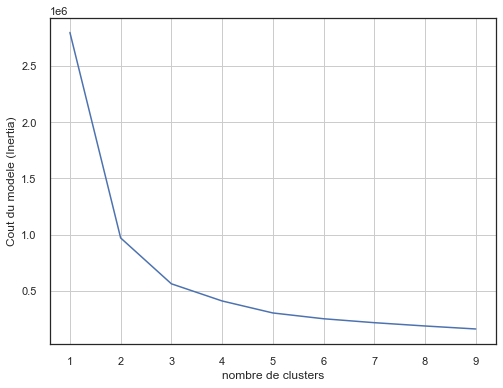

In [95]:
inertia = []
k_range=range(1,10)
for k in k_range:
    model=KMeans(n_clusters=k).fit(Z)
    inertia.append(model.inertia_)
    
fig = plt.figure(figsize=(8,6))
plt.plot(k_range,inertia )
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')
plt.grid()
plt.show()

### AFFICHAGE DES CLUSTERS ET CENTROÏDES

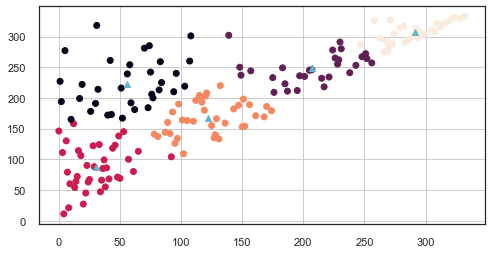

Inertie totale : 302839.2251383129


In [96]:
# Affichage du nuage de points (individus) en cluster avec les centoîdes
fig = plt.figure(figsize=(8,4))
model = KMeans(n_clusters=5)
model.fit(Z)
model.predict(Z)
plt.scatter(Z[:,0], Z[:,1],c=model.predict(Z))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='^',c='c')
plt.grid()
plt.show()
print('Inertie totale :',model.inertia_)

### COEFFICIENT DE SILHOUETTE

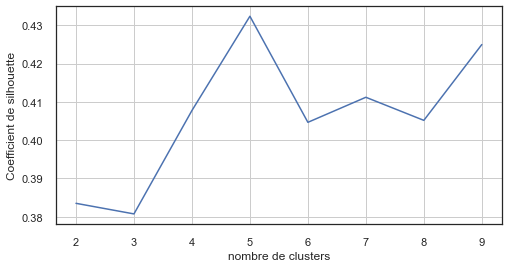

[0.38351431543854225,
 0.38074678735100753,
 0.407749668661732,
 0.43236537481153337,
 0.4046641332807133,
 0.41120648728950976,
 0.4051782753708394,
 0.42497219347980386]

In [97]:
from sklearn.metrics import silhouette_score
tab_silhouette =[]
k_range=range(2,10)
for k in k_range:
    model=KMeans(n_clusters=k)
    cluster_labels=model.fit_predict(X)
    tab_silhouette.append(silhouette_score(X,cluster_labels))

fig = plt.figure(figsize=(8,4))
plt.plot(k_range,tab_silhouette)
plt.xlabel('nombre de clusters')
plt.ylabel('Coefficient de silhouette')
plt.grid()
plt.show()
tab_silhouette

### OBSERVATIONS

En vu d'un partitionnement optimal nous avons couplé 2 méthodes :
 
   - Méthode du coude
   - Coefficient de silhouette

- Avec la méthode du coude, on remarque que l’inertie stagne à partir de 5 clusters.
- Comme por la méthode du coude cette fois ci nous affichons l'évolution du coefficient de silhouette en fonction du nombre de clusters :

   - Le nombre de 5 clusters donne bien le coefficient de silhouette le plus élevé :  0.43
   
L'affichage du nuage de points avec les 5 clusters et leur centroîdes grâce à l'algorithme Kmeans :

   - Le nuage de points est étalé 
   - Le nombre de clusters est optimal, et centroîdes bien distants

-------
## V. ANALYSE DES GROUPES 
-------

### Découpage en classes – Matérialisation des groupes

#### IDENTIFICATION DES GROUPES

In [98]:
#Identification des 5 groupes obtenus
groupes_cah = fcluster(Z, 5, criterion='maxclust')
#index triés des groupes
idg = np.argsort(groupes_cah)
#Affichage des pays selon leurs groupes
df = pd.DataFrame(jointure2.index[idg], groupes_cah[idg]).reset_index()
df2 = df.rename(columns={'index':'Groupe'})
df2.head()

,Groupe,Zone
0,1,Libéria
1,1,Gabon
2,1,Gambie
3,1,Ghana
4,1,Guinée


In [99]:
#Intégration des références des groupes dans notre échantillon de départ représenté par le dataframe "yaz"
#Jointure interne nécessaire pour parvenir à agréger nos données
df3 = pd.merge(jointure2, df2, on='Zone')
df3.set_index('Zone', inplace=True)
df3.head()

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,TAS (%),TDI (%),Croissance démographique (%),Pib (%),Groupe
Zone,,,,,,,,
Afghanistan,1.53,5.0,0.54,49.122807,50.877193,0.247101,3.0,2
Afrique du Sud,35.69,143.0,14.11,78.706327,24.268178,0.092891,17.0,5
Albanie,16.36,85.0,6.26,27.659574,80.851064,-0.009564,9.0,5
Algérie,6.38,22.0,1.97,99.277978,0.722022,0.129027,6.0,2
Allemagne,19.47,71.0,7.96,87.061530,48.418631,0.020710,6.0,5


#### MOYENNES DES VARIABLES PAR GROUPE 

In [100]:
#afficher les moyennes des variables de chaque groupe
groupe=(1,2,3,4,5)
for n in groupe:
    affi=df3.loc[df3['Groupe']==n].mean()
    print(affi)

Disp_quanti_kg/per/an            13.545185
Disp_alim_Kcal/per/jour          45.703704
Disp_prot_g/per/jour              4.752222
TAS (%)                          23.906126
TDI (%)                         101.692533
Croissance démographique (%)      0.194808
Pib (%)                           8.518519
Groupe                            1.000000
dtype: float64
Disp_quanti_kg/per/an            5.093696
Disp_alim_Kcal/per/jour         18.369565
Disp_prot_g/per/jour             1.710217
TAS (%)                         91.170130
TDI (%)                         12.330206
Croissance démographique (%)     0.145253
Pib (%)                          6.500000
Groupe                           2.000000
dtype: float64
Disp_quanti_kg/per/an            49.635385
Disp_alim_Kcal/per/jour         188.461538
Disp_prot_g/per/jour             17.216154
TAS (%)                           7.418215
TDI (%)                         117.572815
Croissance démographique (%)      0.052654
Pib (%)                         

#### LES 5 CLUSTERS

In [101]:
# Cluster 1
cluster_1=df3.loc[df3['Groupe']==1]
cluster_2.head()

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,TAS (%),TDI (%),Croissance démographique (%),Pib (%),Groupe
Zone,,,,,,,,
Afghanistan,1.53,5.0,0.54,49.122807,50.877193,0.247101,3.0,2
Algérie,6.38,22.0,1.97,99.277978,0.722022,0.129027,6.0,2
Azerbaïdjan,13.11,44.0,4.45,80.620155,20.930233,0.071482,7.0,2
Bangladesh,1.50,7.0,0.47,99.600000,0.000000,0.067992,11.0,2
Botswana,3.39,12.0,1.19,71.428571,42.857143,0.100725,11.0,2


In [102]:
# Cluster 2
cluster_2=df3.loc[df3['Groupe']==2]
cluster_2.head(50)

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,TAS (%),TDI (%),Croissance démographique (%),Pib (%),Groupe
Zone,,,,,,,,
Afghanistan,1.53,5.0,0.54,49.122807,50.877193,0.247101,3.0,2
Algérie,6.38,22.0,1.97,99.277978,0.722022,0.129027,6.0,2
Azerbaïdjan,13.11,44.0,4.45,80.620155,20.930233,0.071482,7.0,2
Bangladesh,1.50,7.0,0.47,99.600000,0.000000,0.067992,11.0,2
Botswana,3.39,12.0,1.19,71.428571,42.857143,0.100725,11.0,2
Burkina Faso,2.27,8.0,0.77,100.000000,0.000000,0.225878,9.0,2
Cambodge,2.34,11.0,0.74,73.684211,26.315789,0.101105,10.0,2
Cameroun,3.16,11.0,1.07,98.780488,0.000000,0.198583,7.0,2
"Chine, continentale",12.33,59.0,3.96,100.412973,2.488850,0.028527,9.0,2


In [103]:
cluster_2.shape

(46, 8)

In [104]:
# Cluster 3
cluster_3=df3.loc[df3['Groupe']==3]
cluster_3.head()

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,TAS (%),TDI (%),Croissance démographique (%),Pib (%),Groupe
Zone,,,,,,,,
Antigua-et-Barbuda,54.10,233.0,17.77,0.000000,100.000000,0.065999,2.0,3
Bahamas,43.17,182.0,14.61,23.076923,92.307692,0.060966,4.0,3
Chine - RAS de Hong-Kong,53.51,210.0,22.26,8.571429,323.928571,0.039277,6.0,3
Chine - RAS de Macao,34.47,142.0,11.90,15.789474,121.052632,0.136859,11.0,3
Dominique,35.19,150.0,11.52,0.000000,100.000000,0.007078,-9.0,3


In [105]:
# Cluster 4
cluster_4=df3.loc[df3['Groupe']==4]
cluster_4.head()

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,TAS (%),TDI (%),Croissance démographique (%),Pib (%),Groupe
Zone,,,,,,,,
Argentine,42.24,182.0,13.53,110.142712,0.407747,0.059178,15.0,4
Australie,47.65,192.0,16.60,108.368915,1.366354,0.088496,8.0,4
Barbade,46.78,199.0,15.33,88.235294,11.764706,0.009322,3.0,4
Bolivie (État plurinational de),36.00,155.0,11.43,124.242424,0.233100,0.096835,10.0,4
Brésil,48.03,204.0,15.68,142.266079,0.030054,0.048896,14.0,4


In [106]:
# Cluster 5
cluster_5=df3.loc[df3['Groupe']==5]
cluster_5.head()

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,TAS (%),TDI (%),Croissance démographique (%),Pib (%),Groupe
Zone,,,,,,,,
Afrique du Sud,35.69,143.0,14.11,78.706327,24.268178,0.092891,17.0,5
Albanie,16.36,85.0,6.26,27.659574,80.851064,-0.009564,9.0,5
Allemagne,19.47,71.0,7.96,87.061530,48.418631,0.020710,6.0,5
Arménie,16.06,54.0,5.44,23.404255,74.468085,0.019728,9.0,5
Autriche,18.20,65.0,7.49,85.549133,63.583815,0.039368,5.0,5


### Représentation de la distribution des variables par groupe en utilisant une boite à moustache

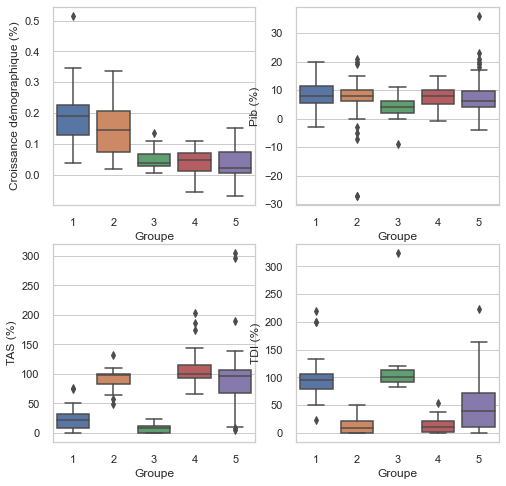

In [107]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df3, x='Groupe', y='Croissance démographique (%)')
plt.subplot(222)
sns.boxplot(data=df3, x='Groupe', y='Pib (%)')
plt.subplot(223)
sns.boxplot(data=df3, x='Groupe', y='TAS (%)')
plt.subplot(224)
sns.boxplot(data=df3, x='Groupe', y='TDI (%)')
plt.savefig('Distribution des variables par groupe.jpg')

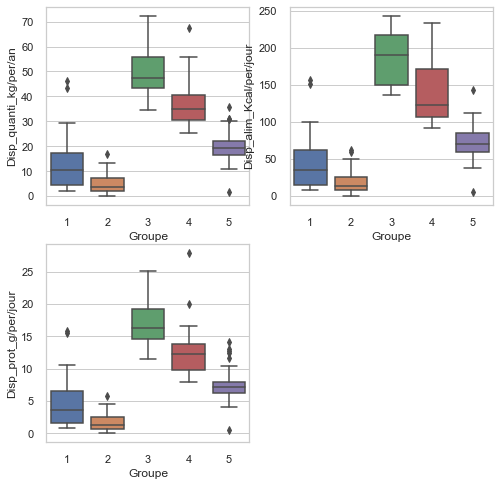

In [108]:
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df3, x='Groupe', y='Disp_quanti_kg/per/an')
plt.subplot(222)
sns.boxplot(data=df3, x='Groupe', y='Disp_alim_Kcal/per/jour')
plt.subplot(223)
sns.boxplot(data=df3, x='Groupe', y='Disp_prot_g/per/jour')
plt.savefig('Distribution des variables par groupe_suite.jpg')

In [109]:
# Moyenne globale
jointure2.mean()

Disp_quanti_kg/per/an           20.280179
Disp_alim_Kcal/per/jour         74.827381
Disp_prot_g/per/jour             7.148810
TAS (%)                         78.212220
TDI (%)                         45.167774
Croissance démographique (%)     0.093898
Pib (%)                          7.220238
dtype: float64

### CARACTIRISTIQUES DE CHAQUE GROUPE

#### GROUPE 1

Ce groupe inclus essentiellement des pays avec :

   - Un taux de dépendance à l'importation des plus élevé
   - Un taux d'auto-suffisance des plus faibles
   - Une croissance démographique des plus élevée
   - Une disponibilité des plus faible
   - Un PIB des plus élevé
   
#### GROUPE 2

Ce groupe inclus essentiellement des pays avec :

   - Un taux de dépendance à l'importation des plus faible
   - Un taux d'auto-suffisance des plus élevé
   - Une croissance démographique élevée
   - Une disponibilité des plus faible
   - Un PIB élevé
   
#### GROUPE 3

Ce groupe inclus essentiellement des pays avec :

   - Un taux de dépendance à l'importation des plus élevé
   - Un taux d'auto-suffisance très faible
   - Une croissance démographique faible
   - Une disponibilité très élevée
   - Un PIB des plus faible
   
#### GROUPE 4

Ce groupe inclus essentiellement des pays avec :

   - Un taux de dépendance à l'importation des plus faible
   - Un taux d'auto-suffisance des plus élevé
   - Une croissance démographique faible
   - Une disponibilité élevée
   - Un PIB élevé
   
#### GROUPE 5

Ce groupe inclus essentiellement des pays avec :

   - Un taux de dépendance à l'importation élevé
   - Un taux d'auto-suffisance élevé
   - Une croissance démographique des plus faible
   - Une disponibilité faible
   - Un PIB élevé

### OBSERVATIONS

Un groupe présente des caractéristiques intéressantes pour notre objectif d'exportation :

##### LE GROUPE 1

Au vu des caractéristiques de chaque groupe la combinaison la plus favorable à la selection du meilleur groupe en terme de besoin de viande de volaille met en avant le groupe numéro 1 :

  - Disp_quanti_kg/per/an             :  13.54
  - Disp_alim_Kcal/per/jour           :  45.70
  - Disp_prot_g/per/jour              :   4.75
  - TAS (%)                           :  23.90
  - TDI (%)                           : 101.69
  - Croissance démographique (%)      :   0.19
  - Pib (%)                           :   8.51
  
Le taux de dépendance à l'importation est très élevé contrairement au taux d'auto-suffisance qui est très bas.

La croissance démographique est la plus élevée, alors que la population totale est la plus faible des 5 groupes.

Les disponibilitéS alimentaires sont égalements relativement basses.

### CROISEMENT ENTRE LES DIFFERENTS CLUSTERS DE PAYS AVEC LES DIFFERENTES VARIABLES

<Figure size 504x504 with 0 Axes>

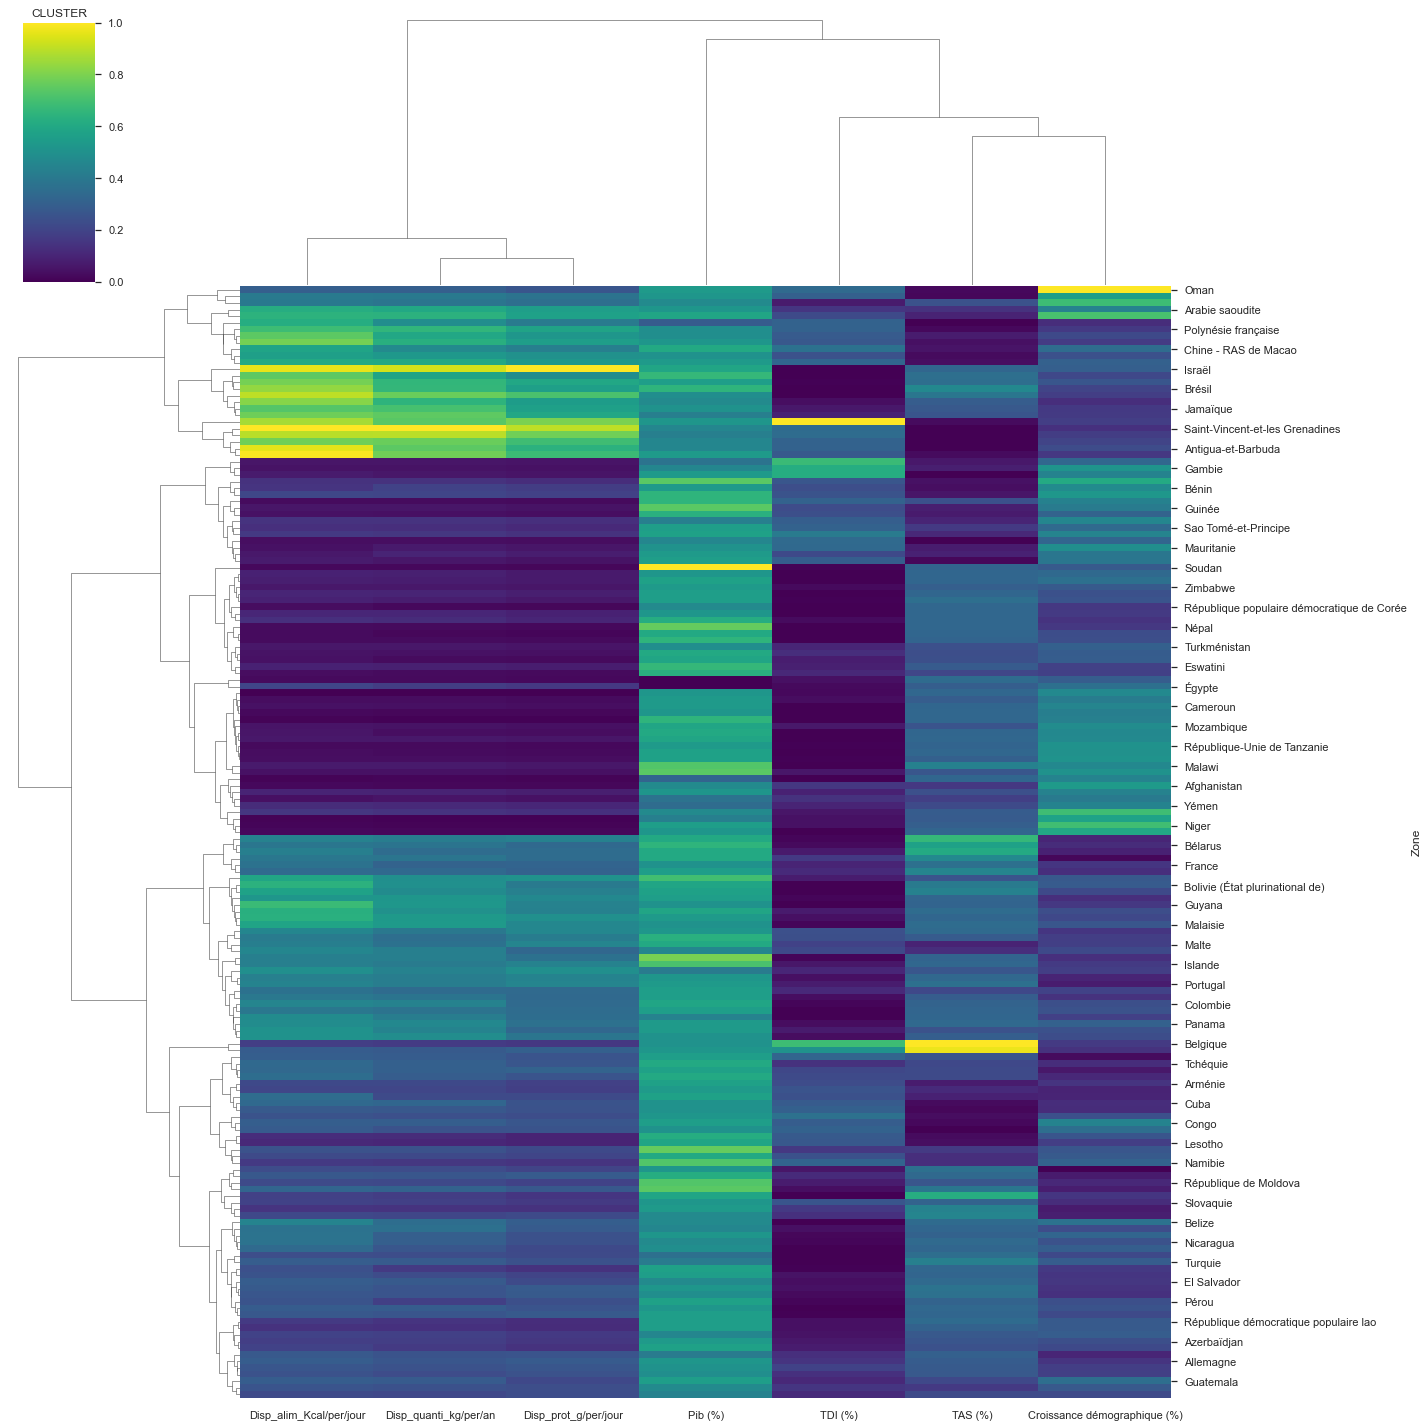

In [110]:
#heatmap avec les croisements entre les clusters de pays et les différentes variables
plt.figure(figsize=(7, 7))
sns.clustermap(jointure2, cmap = 'viridis',method = 'ward',metric = 'euclidean',standard_scale =1,figsize = (20, 20))
plt.title('CLUSTER')
plt.savefig('Heatmap Cluster.jpg')

### OBSERVATIONS

La heatmap met bien en évidence la combinaison du cluster 1 avec les variables (indicateurs) :

     - TDI élevé
     - Croissance démographique élevée
     - TAS faibe
     - Pib élevé
     - Disponibilités faibles
Le groupe numéro 1 semble bien être le cluster idéal. Nous continuons notre analyse pour confirmer ces observations

### CORRÉLATIONS ENTRE LES VARIABLES DANS CHAQUE GROUPE

Nous recherchons un cluster qui corréspond le plus au critères ci dessous :
   - TDI négativement corrélé au TAS, aux disponibilités et population totale 
   
Cela corrésponderait aux pays qui ont encore des besoins en viande de volailles

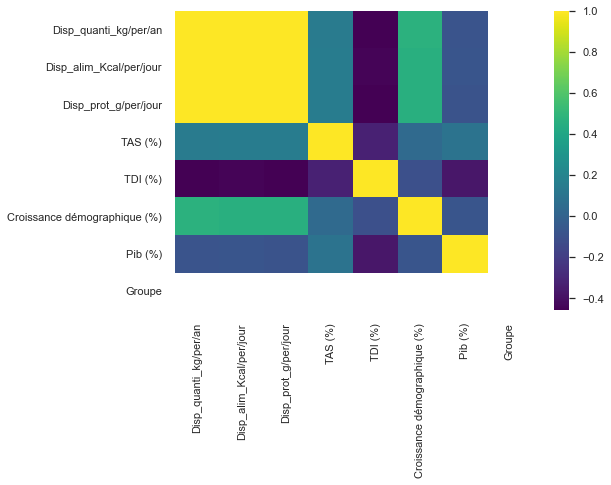

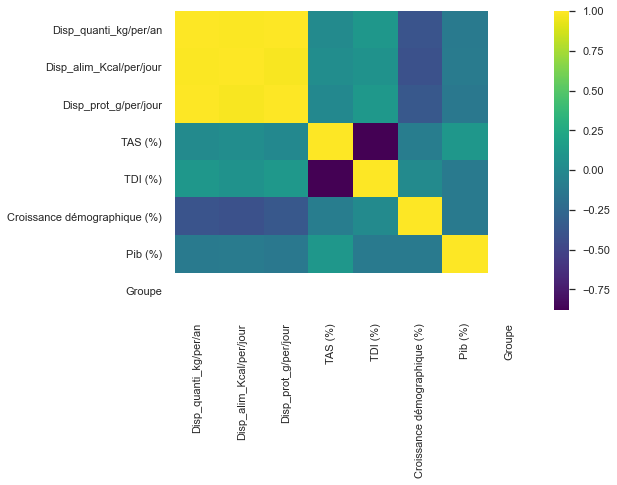

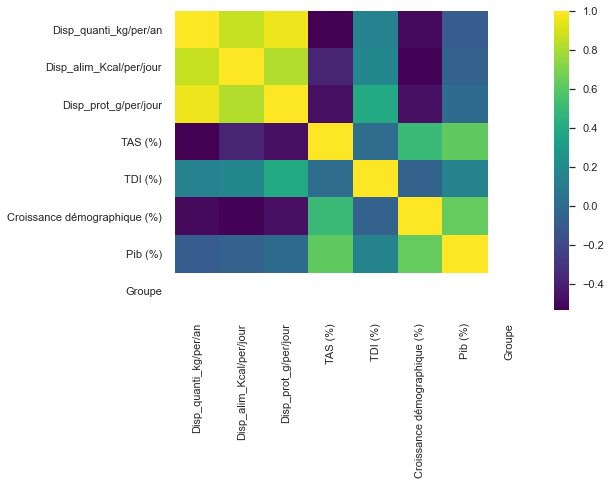

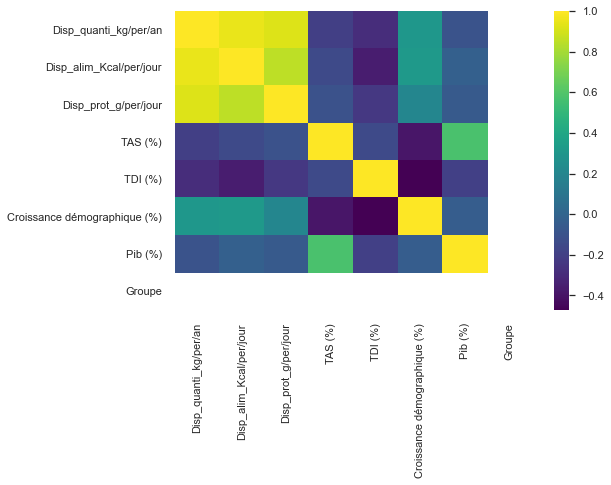

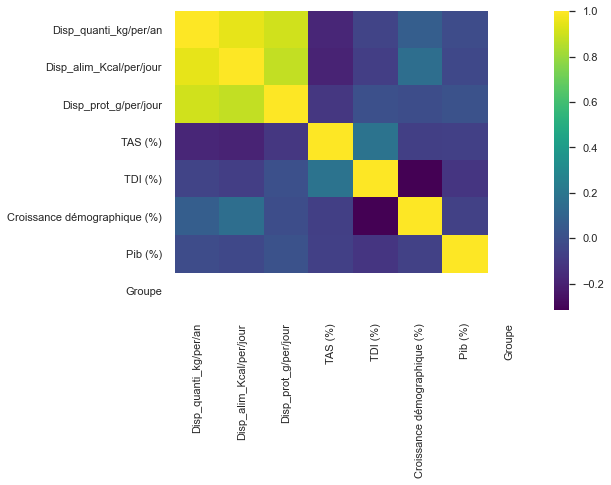

In [111]:
# heatmap de corrélations entre les différentes variables dans chaque cluster
groupe=(cluster_1,cluster_2,cluster_3,cluster_4,cluster_5)
for n in groupe:
    #df_norm_col=(n-n.mean())/n.std()
    sns.heatmap(n.corr(),cmap='viridis') #sns.clustermap(tz, cmap = 'viridis', method = 'ward',metric = 'euclidean')  
    plt.show()

### OBSERVATIONS

La heatmap du cluster numéro 1 confirme bien notre choix

-------
## VI. ANALYSE EN COMPOSANTES PRINCIPALES (ACP)
-------

### Eboulis des valeurs propres

  - On affiche le diagramme qui décrit le pourcentage d’inertie totale associé à chaque axe.
  - On affiche également une courbe qui représente la somme cumulée des inerties.
  - Cela nous permet d'apprécier le nombre et le 

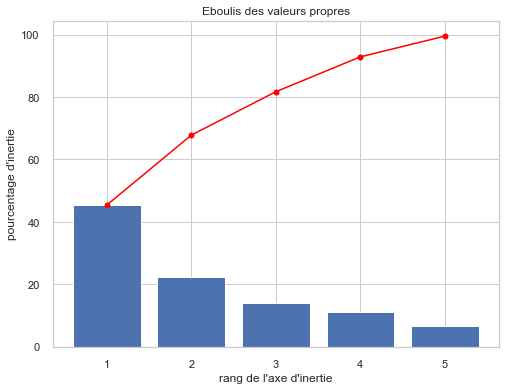

In [112]:
# choix du nombre de composantes à calculer
n_comp = 5
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)
# Eboulis des valeurs propres
figure1 = plt.figure(figsize=(8,6))
display_scree_plot(pca)
plt.show()

### OBSERVATIONS

  Nous avons dans notre cas l'inertie totale répartie inéquitablement sur 5 axes
  - Axe 1 : 45,4 % de l'inertie totale
  - Axe 2 : 22,4 % de l'inertie totale
  - Axe 3 : 13,9 % de l'inertie totale
  - Axe 4 : 11,2 % de l'inertie totale
  - Axe 5 : 7,1 % de l'inertie totale

### CERCLES DES CORRÉLATIONS

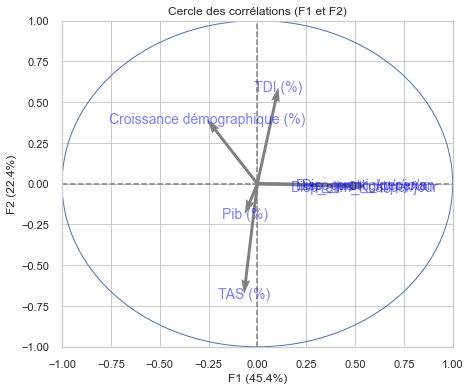

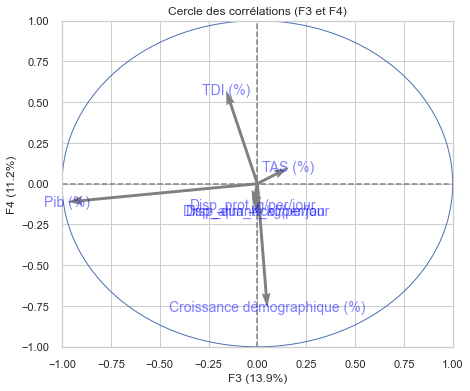

In [113]:
# choix du nombre de composantes à calculer
n_comp = 5
# selection des colonnes à prendre en compte dans l'ACP
features = jointure2.columns
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3)], labels = np.array(features) )
plt.show()

#### CORRÉLATIONS DES VARIABLES AVEC LES COMPOSANTES PRINCIPALES

In [114]:
# création de la matrice de corrélation
t=pca.components_[:]
df_corr_comp = pd.DataFrame(t,index = ['F1', 'F2', 'F3','F4','F5'],columns=jointure2.columns)
df_corr_comp.head()

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,TAS (%),TDI (%),Croissance démographique (%),Pib (%)
F1,0.552996,0.550529,0.551653,-0.068518,0.108118,-0.257413,-0.064393
F2,-0.007824,-0.019873,-0.010562,-0.677380,0.591983,0.393828,-0.187200
F3,-0.008932,-0.006687,-0.023219,0.158810,-0.160183,0.050492,-0.972578
F4,-0.168616,-0.167033,-0.131503,0.098792,0.572561,-0.759146,-0.111744
F5,0.054127,0.045882,0.097800,0.707644,0.531608,0.446906,0.048048


### OBSERVATIONS

  - F1 : Variables corrélées positivement:
 
      - Toutes les disponibiltées sont corrélées (0.55), on peut dire que l'axe F1 représente les disponibilitées
  
  - F2 : 
      - variables corrélées positivement : Le TDI est fortement corrélé (0.59)
      - variables corrélées négativement : Le TAS est fortement corrélé (- 0,67)
 
On peut dire que les pays avec un fort TDI ont une tendance positive en terme de croissance démographique et un faible TAS

  - F3 :
      - variables corrélées négativement : le Pib est très fortement corrélé (- 0,97)
      
  - F4 : 
      - variables corrélées positivement : Le TDI est fortement corrélé (0.57)
      - variables corrélées négativement : Le TAS est fortement corrélé (- 0.75)

On peut dire que sur cet axe les pays avec un fort TDI ont également une tendance positive en terme de TAS

### PROJECTIONS DES INDIVIDUS

   - Nous utiliserons 4 composantes principales pour projeter les individus.
   - Nous appliquerons également le critère de Kaiser (100/p) % pour analyser cette projection
   - Critère de Kaiser = (100/7) = 14,28
   
Nous utiliserons dans ce cas les 2 premières composantes F1 et F2 pour notre analyse

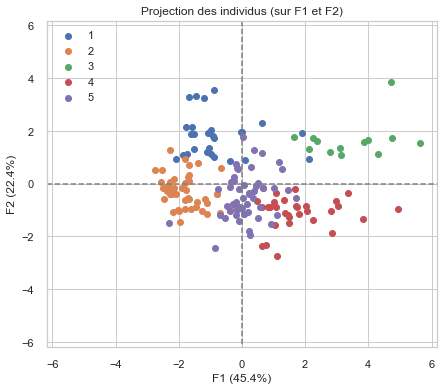

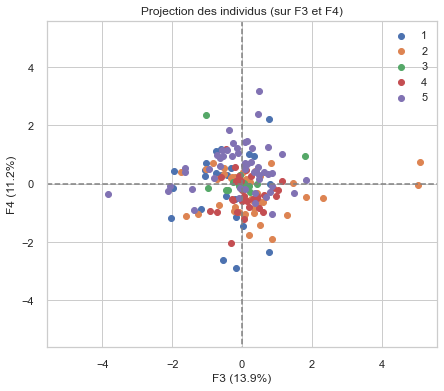

<Figure size 720x720 with 0 Axes>

In [115]:
# selection des intitulés des groupes
names = df3["Groupe"]  
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3)], illustrative_var = names, alpha = 1)
figure3 = plt.figure(figsize=(10,10))
plt.show()

### OBSERVATIONS

Nous observons sur le plan 1 le groupe 1 (bleu) qui se présente bien sur l'axe F1 en partie positive du TDI et négative de l'axe F1 (disponibilités).

Ce cluster présente bien les critères suivants :

  - TDI élévé
  - TAS faible
  - Croissance démographique relativement élevée
  - Des disponibilités très faibles

In [116]:
cluster_1.shape

(27, 8)

In [117]:
# Inserer la colonne 'population totale' et afficher les résultats par disponibilité en kcal (affichage ascendant)
population_totale=population_nv.loc[:,[2017]]
population_totale.rename(columns ={2017: "Population totale"}, inplace= True)
cluster_final =cluster_1.merge(population_totale,on='Zone',how='inner')
groupe_candidat=cluster_final.loc[:,cluster_final.columns != 'Groupe']
groupe_candidat.sort_values(by = ['Disp_alim_Kcal/per/jour'], ascending = True).head()

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,TAS (%),TDI (%),Croissance démographique (%),Pib (%),Population totale
Zone,,,,,,,,
Guinée-Bissau,2.16,7.0,0.74,75.000000,100.000000,0.185770,14.0,1828.145
Mongolie,2.77,9.0,0.95,0.000000,111.111111,0.120583,2.0,3113.786
Mauritanie,5.14,11.0,1.59,22.727273,109.090909,0.218999,5.0,4282.570
Kirghizistan,3.10,11.0,1.08,21.875000,78.125000,0.115462,13.0,6189.733
Gambie,3.53,12.0,1.24,25.000000,200.000000,0.234405,2.0,2213.889


------
## VII. EXPLORATION DU CLUSTER SELECTIONNÉ 
------
Pour affiner d'avantage notre analyse, nous procédrons au partitionnement de ce groupe

### METHODE DU COUDE

Rechercher le nombre de cluster optimal

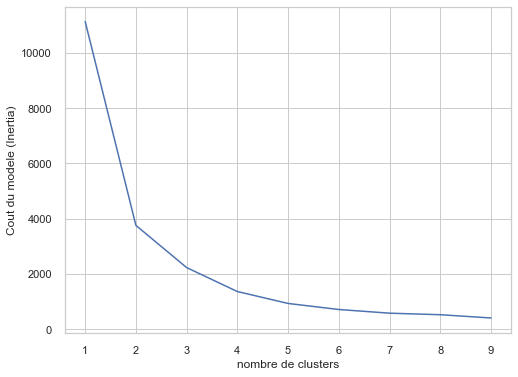

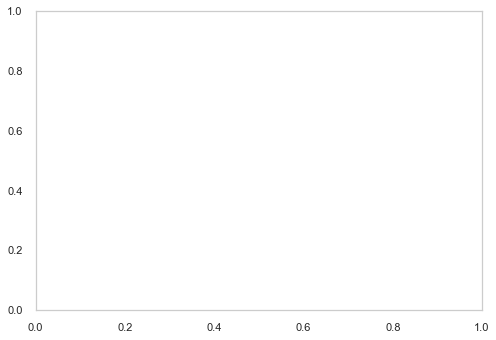

In [118]:
Y= cluster_1.values
# centrer et réduire les données
std_scale2 = preprocessing.StandardScaler().fit(Y)
X_scaled2 = std_scale2.transform(Y)
# création d'une Matrice des liens selon la Méthode de Ward
Z2 = linkage(X_scaled2, method = 'ward', metric='euclidean')
inertia2 = []
k_range2=range(1,10)
for k2 in k_range2:
    model2=KMeans(n_clusters=k2).fit(Z2)
    inertia2.append(model2.inertia_)
    
fig = plt.figure(figsize=(8,6))
plt.plot(k_range2,inertia2 )
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')
plt.show()
plt.grid()

### Affichage des clusters avec la méthode KMeans

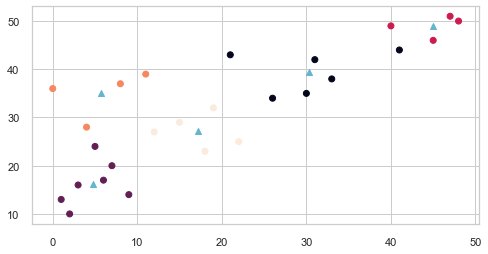

Inertie totale : 932.3397902065974


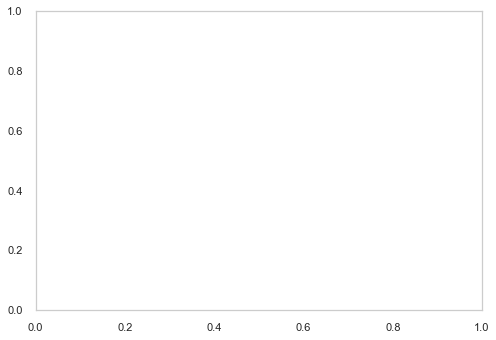

In [119]:
# Affichage du nuage de points (individus) en cluster avec les centoîdes
fig = plt.figure(figsize=(8,4))
model3 = KMeans(n_clusters=5)
model3.fit(Z2)
model3.predict(Z2)
plt.scatter(Z2[:,0], Z2[:,1],c=model3.predict(Z2))
plt.scatter(model3.cluster_centers_[:,0], model3.cluster_centers_[:,1], marker='^',c='c')
plt.show()
plt.grid()
print('Inertie totale :',model3.inertia_)

### Identification des sous - groupes

In [120]:
#Identification des 5 groupes obtenus
groupes = fcluster(Z2, 5, criterion='maxclust')
#index triés des groupes
idg2 = np.argsort(groupes)
#Affichage des pays selon leurs groupes
df_groupe = pd.DataFrame(cluster_1.index[idg2], groupes[idg2]).reset_index()
df_groupe2 = df_groupe.rename(columns={'index':'Sous_Groupes'})
df_groupe2['Sous_Groupes'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [121]:
#Intégration des références des groupes dans notre échantillon de départ représenté par le dataframe "yaz"
#Jointure interne nécessaire pour parvenir à agréger nos données
df_gr = pd.merge(cluster_1, df_groupe2, on='Zone')
df_gr.set_index('Zone', inplace=True)
df_groupe3 =df_gr.merge(population_totale,on='Zone',how='inner')
df_groupe3.head()

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,TAS (%),TDI (%),Croissance démographique (%),Pib (%),Groupe,Sous_Groupes,Population totale
Zone,,,,,,,,,,
Angola,10.56,35.0,3.60,13.166144,86.833856,0.287203,20.0,1,5,29816.766
Arabie saoudite,43.36,151.0,15.57,42.926829,50.313589,0.190975,6.0,1,1,33101.179
Bénin,14.40,37.0,4.98,11.180124,76.397516,0.210597,7.0,1,2,11175.198
Congo,21.53,72.0,7.45,6.363636,94.545455,0.192011,8.0,1,2,5110.695
Gabon,29.33,99.0,10.59,5.128205,97.435897,0.256554,6.0,1,2,2064.823


### Explorer la distribtion des valeurs par variables et sous - groupes

<AxesSubplot:xlabel='Sous_Groupes', ylabel='TDI (%)'>

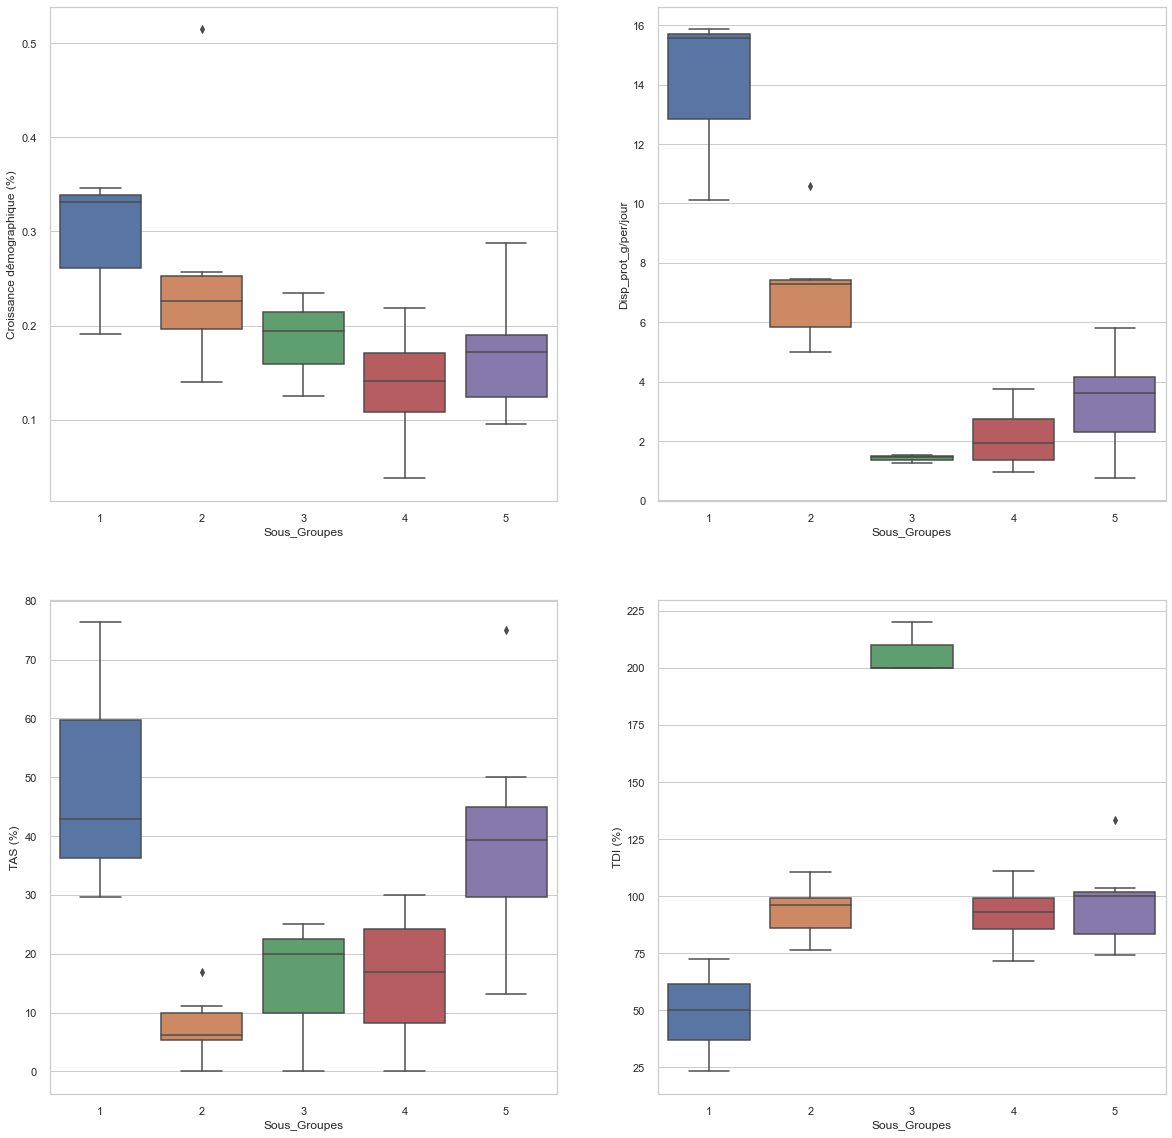

In [122]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df_groupe3, x='Sous_Groupes', y='Croissance démographique (%)')
plt.subplot(222)
sns.boxplot(data=df_groupe3, x='Sous_Groupes', y='Disp_prot_g/per/jour')
plt.subplot(223)
sns.boxplot(data=df_groupe3, x='Sous_Groupes', y='TAS (%)')
plt.subplot(224)
sns.boxplot(data=df_groupe3, x='Sous_Groupes', y='TDI (%)')

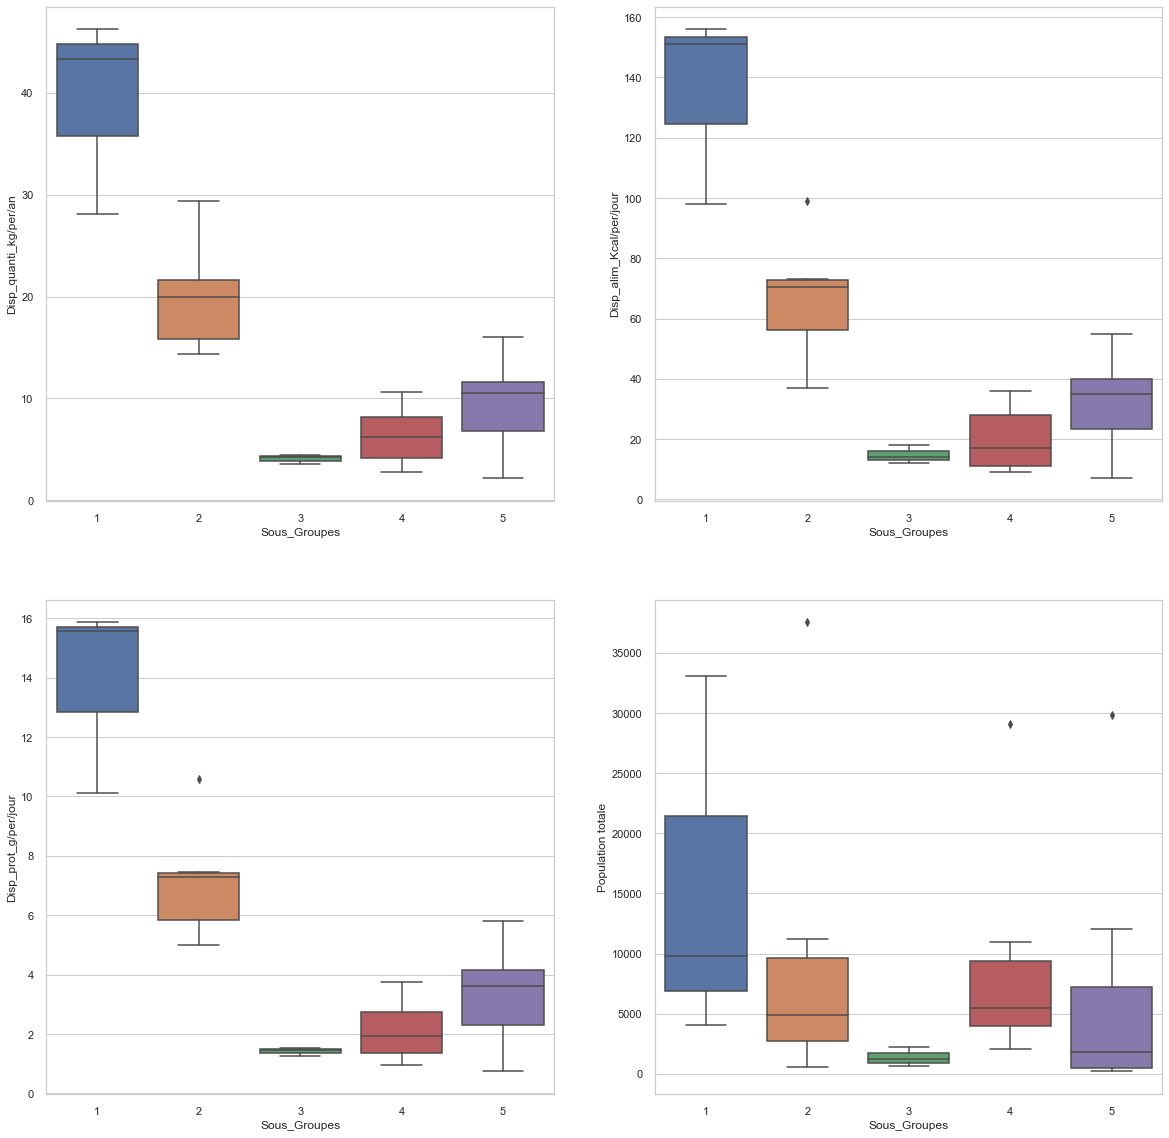

In [123]:
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df_groupe3, x='Sous_Groupes', y='Disp_quanti_kg/per/an')
plt.subplot(222)
sns.boxplot(data=df_groupe3, x='Sous_Groupes', y='Disp_alim_Kcal/per/jour')
plt.subplot(223)
sns.boxplot(data=df_groupe3, x='Sous_Groupes', y='Disp_prot_g/per/jour')
plt.subplot(224)
sns.boxplot(data=df_groupe3, x='Sous_Groupes', y='Population totale')
plt.savefig('boxplot.jpg')

In [124]:
# Cluster 1bis
cluster_1bis=df_groupe3.loc[df_groupe3['Sous_Groupes']==1]
cluster_1bis.head()

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,TAS (%),TDI (%),Croissance démographique (%),Pib (%),Groupe,Sous_Groupes,Population totale
Zone,,,,,,,,,,
Arabie saoudite,43.36,151.0,15.57,42.926829,50.313589,0.190975,6.0,1,1,33101.179
Jordanie,28.07,98.0,10.10,76.363636,23.272727,0.331066,3.0,1,1,9785.843
Koweït,46.25,156.0,15.87,29.629630,72.486772,0.345821,10.0,1,1,4056.099


In [125]:
# Cluster 2bis
cluster_2bis=df_groupe3.loc[df_groupe3['Sous_Groupes']==2]
cluster_2bis.head()

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,TAS (%),TDI (%),Croissance démographique (%),Pib (%),Groupe,Sous_Groupes,Population totale
Zone,,,,,,,,,,
Bénin,14.40,37.0,4.98,11.180124,76.397516,0.210597,7.0,1,2,11175.198
Congo,21.53,72.0,7.45,6.363636,94.545455,0.192011,8.0,1,2,5110.695
Gabon,29.33,99.0,10.59,5.128205,97.435897,0.256554,6.0,1,2,2064.823
Iraq,14.95,52.0,5.37,16.961131,83.038869,0.240994,14.0,1,2,37552.781
Luxembourg,18.33,69.0,7.19,0.000000,100.000000,0.139997,5.0,1,2,591.910


In [126]:
# Cluster 1bis
cluster_3bis=df_groupe3.loc[df_groupe3['Sous_Groupes']==3]
cluster_3bis.head()

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,TAS (%),TDI (%),Croissance démographique (%),Pib (%),Groupe,Sous_Groupes,Population totale
Zone,,,,,,,,,,
Gambie,3.53,12.0,1.24,25.0,200.0,0.234405,2.0,1,3,2213.889
Timor-Leste,4.24,14.0,1.46,20.0,220.0,0.124681,-3.0,1,3,1243.258
Îles Salomon,4.45,18.0,1.51,0.0,200.0,0.193806,7.0,1,3,636.039


In [127]:
# Cluster 1bis
cluster_4bis=df_groupe3.loc[df_groupe3['Sous_Groupes']==4]
cluster_4bis.head(10)

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,TAS (%),TDI (%),Croissance démographique (%),Pib (%),Groupe,Sous_Groupes,Population totale
Zone,,,,,,,,,,
Ghana,7.24,16.0,2.26,28.436019,71.563981,0.162095,7.0,1,4,29121.465
Haïti,8.91,31.0,2.75,9.183673,90.816327,0.086419,12.0,1,4,10982.366
Kirghizistan,3.10,11.0,1.08,21.875000,78.125000,0.115462,13.0,1,4,6189.733
Lesotho,7.93,27.0,2.72,11.764706,88.235294,0.037652,10.0,1,4,2091.534
Libéria,10.67,36.0,3.74,30.000000,96.000000,0.198903,0.0,1,4,4702.226
Mauritanie,5.14,11.0,1.59,22.727273,109.090909,0.218999,5.0,1,4,4282.570
Mongolie,2.77,9.0,0.95,0.000000,111.111111,0.120583,2.0,1,4,3113.786
Tadjikistan,4.45,18.0,1.45,5.000000,95.000000,0.161740,8.0,1,4,8880.268


In [128]:
# Cluster 1bis
cluster_5bis=df_groupe3.loc[df_groupe3['Sous_Groupes']==5]
cluster_5bis.head()

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,TAS (%),TDI (%),Croissance démographique (%),Pib (%),Groupe,Sous_Groupes,Population totale
Zone,,,,,,,,,,
Angola,10.56,35.0,3.60,13.166144,86.833856,0.287203,20.0,1,5,29816.766
Guinée,4.08,14.0,1.42,26.000000,74.000000,0.171767,20.0,1,5,12067.519
Guinée-Bissau,2.16,7.0,0.74,75.000000,100.000000,0.185770,14.0,1,5,1828.145
Monténégro,15.98,55.0,5.79,40.000000,80.000000,0.095503,11.0,1,5,627.563
Namibie,11.53,40.0,4.25,39.285714,103.571429,0.115822,19.0,1,5,2402.633


### Afficher les moyennes

In [129]:
#afficher les moyennes des variables de chaque sous - groupes
groupe=(1,2,3,4,5)
for n in groupe:
    moy=df_groupe3.loc[df_groupe3['Sous_Groupes']==n].mean()
    print('Groupe',n,moy)

Groupe 1 Disp_quanti_kg/per/an              39.226667
Disp_alim_Kcal/per/jour           135.000000
Disp_prot_g/per/jour               13.846667
TAS (%)                            49.640032
TDI (%)                            48.691030
Croissance démographique (%)        0.289287
Pib (%)                             6.333333
Groupe                              1.000000
Sous_Groupes                        1.000000
Population totale               15647.707000
dtype: float64
Groupe 2 Disp_quanti_kg/per/an              20.028333
Disp_alim_Kcal/per/jour            67.000000
Disp_prot_g/per/jour                7.160000
TAS (%)                             7.628908
TDI (%)                            93.657342
Croissance démographique (%)        0.259184
Pib (%)                             7.833333
Groupe                              1.000000
Sous_Groupes                        2.000000
Population totale               10193.555833
dtype: float64
Groupe 3 Disp_quanti_kg/per/an              4.073333

### Observations

Comme pour l'analyse des groupes, certains sous-groupes présentent des caractéristiques plus favorables à notre objectif.

  - Les groupes 3 et 4 présentent les critères :
     - TDI très élevé
     - TAS très faible
     - Disponiblités faibles
     - PIB élevé


  - On peut constater que ces pays présentent des dispnibilités faibles alors que le TDI est élevé
  - Ces pays peuvent être une destination pertinente pour l'exportation de viande de volaille


------
## VIII. CONCLUSION
------

Le groupe de pays qui correspond au critères de selection en terme de besoins en viande de volaille est le groupe 1.
De ce groupe nous avons selectionné les pays qui correspondent le mieux au profil recherché.

Nous optons pour le sous-groupe 4

   - Mauritanie
   - Haïti
   - Kirghizistan
   - Tadjikistan	
   - Ghana
   - Lesotho 
   - Libéria
   - Mongolie	
    
Pour tous ces pays le taux de dépendance à l'importation est élevé et inversement le taux d'autosuffisance est faible.

Les pays ayants les plus faibles disponibilités alors qu'ils sont très dépendants à l'importation pourraient correspondre tout à fait à notre besoin.

Cette liste sera affinée avec les équipes métiers